# IRIS 데이터셋

- [원본자료 사이트](https://archive.ics.uci.edu/ml/datasets/Iris)
- Updated Sept 21 by C.Blake - Added discrepency information

reference : https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/

1. 아이리스 식물 데이터셋
2. 자료 갯수: 150 (각 꽃 항목마다 50개씩)
3. 속성 갯수: 수치형 4개, 라벨형 1개
4. 속성 정보:
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: 
      - Iris Setosa
      - Iris Versicolour
      - Iris Virginica
5. 통계 요약

|             | Min | Max | Mean |  SD  |  Class Correlation|
|:-----------:|:---:|:---:|:----:|:----:|:-----------------:|
|sepal length:| 4.3 | 7.9 | 5.84 | 0.83 |   0.7826          |
|sepal width: | 2.0 | 4.4 | 3.05 | 0.43 |  -0.4194          |
|petal length:| 1.0 | 6.9 | 3.76 | 1.76 |   0.9490  (high!) |
|petal width: | 0.1 | 2.5 | 1.20 | 0.76 |   0.9565  (high!) |

In [1]:
%load_ext rpy2.ipython

## 데이터 불러오기

In [2]:
import pandas as pd

# 필드 이름
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# 데이터 불러오기
df = pd.read_csv('iris.data', header=None, names=names)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## R 코드로 데이터 살펴보기

In [3]:
%%R
install.packages("ggplot2", repos='http://cran.us.r-project.org', quiet=TRUE)
install.packages("magrittr", repos='http://cran.us.r-project.org', quiet=TRUE)
library(ggplot2)
library(magrittr)

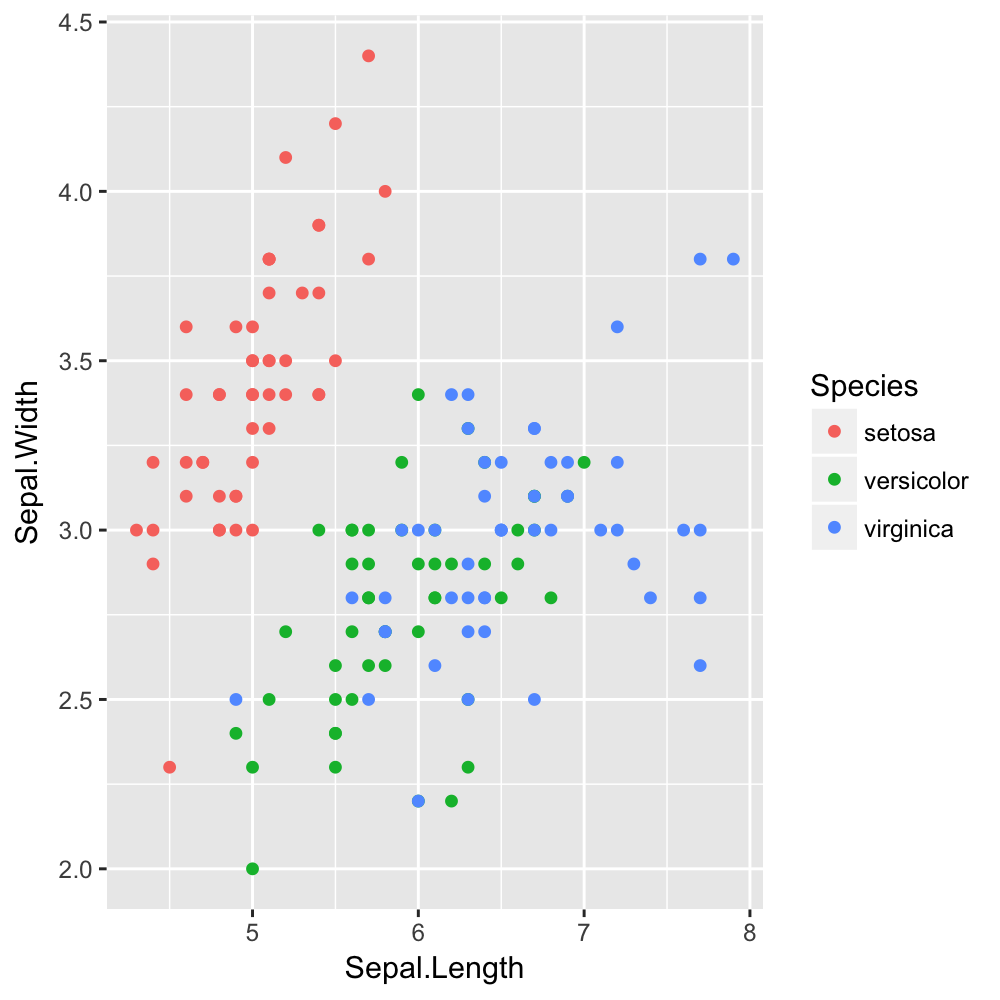

In [4]:
%%R -i df -w 5 -h 5 --units in -r 200
# sepal width vs. sepal length
iris %>%
    ggplot(aes(x=Sepal.Length, y=Sepal.Width, color=Species)) +
    geom_point()

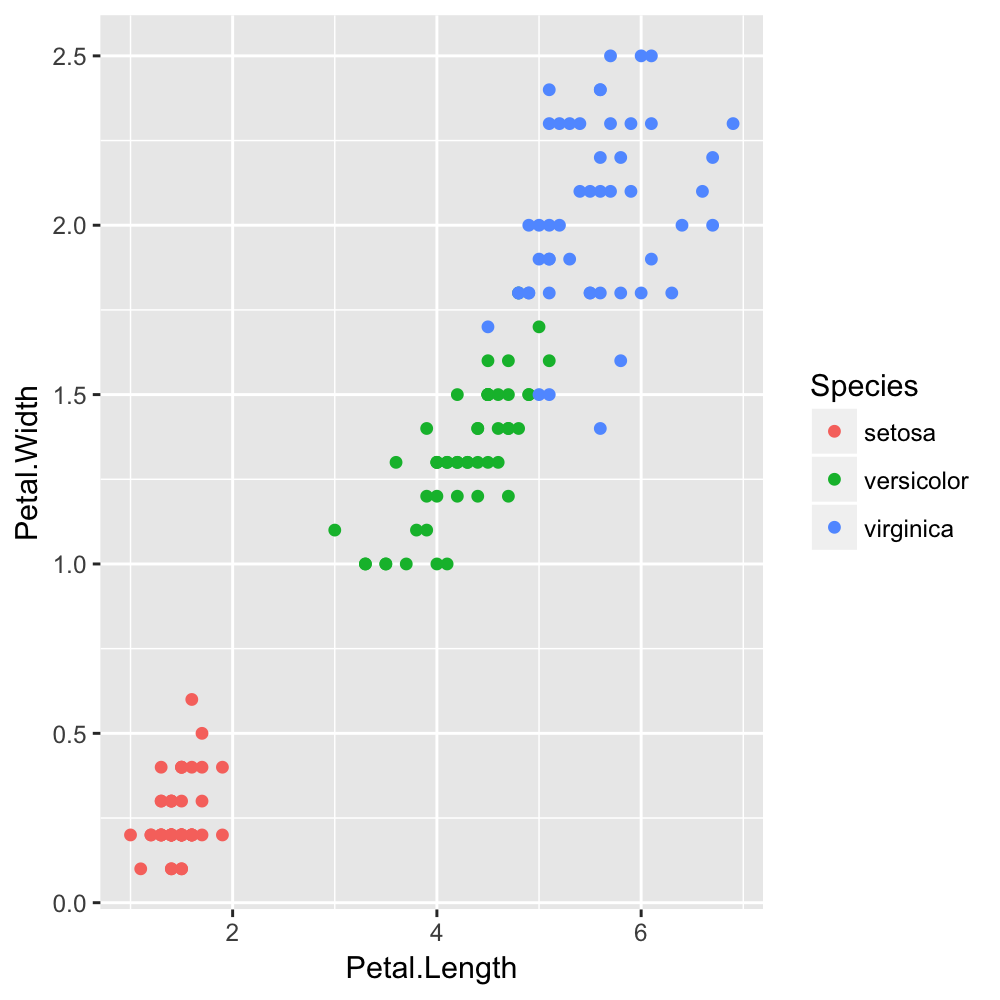

In [5]:
%%R -i df -w 5 -h 5 --units in -r 200
# petal width vs. petal length
iris %>%
    ggplot(aes(x=Petal.Length, y=Petal.Width, color=Species)) +
    geom_point()

## 데이터셋 준비과정

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:2].values, df['class'].values,
                                                    test_size=0.2, random_state=42, shuffle=True)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120, 2) (120,)
(30, 2) (30,)


## 분류기 생성

In [29]:
from sklearn.neighbors import KNeighborsClassifier

k = 37
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=37, p=2,
           weights='uniform')

## 예측과 결과

In [30]:
y_predict = knn.predict(X_test)
result = (y_predict == y_test)

correct_count = np.count_nonzero(result==True)
incorrect_count = np.count_nonzero(result==False)

#print(result)
print('error :', incorrect_count*100 / (correct_count + incorrect_count),'%')

error : 10.0 %


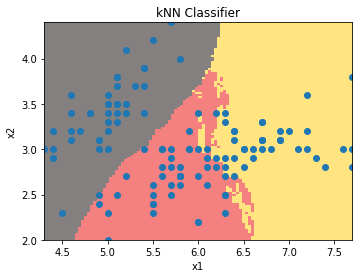

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

# 분류기 시각화
class2int = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
knn_classifier_individual = lambda x: knn.predict([x])[0]

# Draw Original Data
x1 = X_train[:,0]
x2 = X_train[:,1]
plt.scatter(x1,x2)

# Set the color map to match the number of category
hot = plt.get_cmap('hot')
cNorm  = colors.Normalize(vmin=0, vmax=3)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=hot)

# Draw result
x1_min, x1_max = min(x1), max(x1)
x2_min, x2_max = min(x2), max(x2)
linex1 = np.linspace(x1_min,x1_max, num=100)
linex2 = np.linspace(x2_min,x2_max, num=100)
field = [[scalarMap.to_rgba(class2int[knn_classifier_individual([x1,x2])])
          for x1 in linex1] for x2 in linex2]

plt.imshow(field, origin='lower', extent=(x1_min,x1_max,x2_min, x2_max), alpha=0.5)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('kNN Classifier')
plt.show()

## k-fold cross validation
code reference : https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/

In [28]:
from sklearn.model_selection import cross_val_score

myList = list(range(1,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn,
                            X_train,
                            y_train,
                            cv=10,
                            scoring='accuracy')
    scores.append(score.mean())

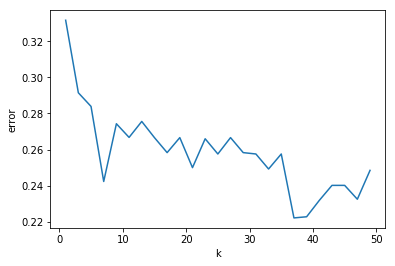

In [27]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('k')
plt.ylabel('error')
plt.show()